In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')


In [2]:
y = np.load('.././Content Based/Dataset-Numpy/ratings.npy')
y = y.T
print(y.shape)

(9107, 671)


In [3]:
r = np.load('.././Content Based/Dataset-Numpy/bool_r.npy')
r = r.T
print(r.shape)

(9107, 671)


In [4]:
numMovies = y.shape[0]
numUsers = y.shape[1]
numFeatures = 19

In [5]:
X = np.random.normal(loc=0.0, scale=0.01, size=(numMovies, numFeatures))
Theta = np.random.normal(loc=0.0, scale=0.01, size=(numFeatures, numUsers))
print('X : ', X.shape)
print('Theta : ', Theta.shape)
X = np.random.normal(loc=0.0, scale=0.01, size=(numMovies, numFeatures))
Theta = np.random.normal(loc=0.0, scale=0.01, size=(numFeatures, numUsers))

X :  (9107, 19)
Theta :  (19, 671)



 15%|█▌        | 152/1000 [00:41<03:52,  3.65it/s]


 30%|███       | 303/1000 [01:20<03:04,  3.77it/s]


 45%|████▌     | 454/1000 [01:59<02:23,  3.81it/s]


 60%|██████    | 605/1000 [02:38<01:43,  3.82it/s]


 76%|███████▌  | 756/1000 [03:17<01:03,  3.83it/s]


 91%|█████████ | 907/1000 [03:56<00:24,  3.84it/s]


100%|██████████| 1000/1000 [04:20<00:00,  3.84it/s]


nan


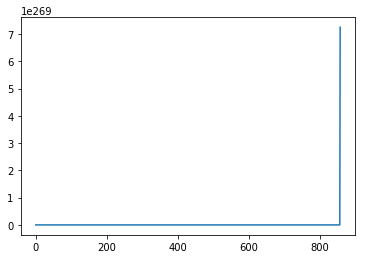

In [22]:
epochs = 1000
learning_rate = 1e-4
losses = []

for i in tqdm(range(epochs)):
    
    if i%2 == 0:
        y_pred = np.matmul(X, Theta)
        y_pred = np.abs(y_pred*r)
        l = y_pred - y
        loss = np.sum(np.square(l))/numMovies

        dTheta = np.dot(X.T, l)
        Theta = Theta - learning_rate*dTheta
        losses.append(loss) 
        
    else:
        y_pred = np.matmul(X, Theta)
        y_pred = np.abs(y_pred*r)
        l = y_pred - y
        loss = np.sum(np.square(l))/numMovies
        
        dX = np.dot(l, Theta.T)
        X = X - learning_rate*dX
        losses.append(loss)

print(loss)
plt.plot(losses)
plt.show()

In [20]:
pd.DataFrame(y).head()

,0,1,2,3,4,5,6,7,8,9,...,661,662,663,664,665,666,667,668,669,670
0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,...,0.0,4.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,5.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
pd.DataFrame(y_pred).head()

,0,1,2,3,4,5,6,7,8,9,...,661,662,663,664,665,666,667,668,669,670
0,0.0,0.0,0.0,0.0,0.000000,0.0,3.639173,0.0,3.808004,0.0,...,0.000000,3.30813,4.092742,0.000000,0.0,0.0,0.0,0.0,3.982374,4.224235
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,3.378344,0.00000,0.000000,3.172457,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.0,0.0,0.0,3.476482,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.00000,0.000000,2.948558,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.00000,0.000000,3.157928,0.0,0.0,0.0,0.0,0.000000,0.000000
